In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy.random import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from tensorflow.keras.models import Sequential

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

from tensorflow.keras import optimizers

In [ ]:
print(os.listdir("/content/drive/MyDrive/four_classes"))

['train', 'test']


In [ ]:
ls /content/drive/MyDrive/four_classes/train

covid/  normal/  pneumonia_bacterial/  pneumonia_viral/


In [ ]:
ls/content/drive/MyDrive/four_classes/test

covid/  normal/  pneumonia_bacterial/  pneumonia_viral/


In [ ]:
from os import listdir

data_list = listdir('/content/drive/MyDrive/four_classes/train')

print(len(data_list))


DATASET_PATH  = '/content/drive/MyDrive/four_classes/train'
test_dir =  '/content/drive/MyDrive/four_classes/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 80
LEARNING_RATE =0.0001


4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"   
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"  
                                                  )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 1119 images belonging to 4 classes.
Found 277 images belonging to 4 classes.


In [ ]:
train_batches.class_indices

{'covid': 0, 'normal': 1, 'pneumonia_bacterial': 2, 'pneumonia_viral': 3}

In [ ]:
train_batches.image_shape

(150, 150, 3)

In [ ]:
path="/content/drive/MyDrive/four_classes"
!ls -a /content/drive/MyDrive/four_classes/train/.ipynb_checkpoints
!rm -R /content/drive/MyDrive/four_classes/test/.ipynb_checkpoints 
!pwd

ls: cannot access '/content/drive/MyDrive/four_classes/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/drive/MyDrive/four_classes/test/.ipynb_checkpoints': No such file or directory
/content


In [ ]:
from tensorflow.keras.applications import Xception

conv_base = Xception(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


conv_base.trainable = True


model = Sequential()
model.add(conv_base)




model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))



83697664/83683744 [==============================] - 1s 0us/step


In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])



In [ ]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 module_wrapper (ModuleWrapp  (None, 51200)            0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 51200)            0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 256)              13107456  
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 4)                1028      
 pper)                                                  

In [ ]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )

112
28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/80
111/111 [==============================] - 294s 2s/step - loss: 0.6384 - binary_accuracy: 0.7599 - val_loss: 56.4740 - val_binary_accuracy: 0.6972
Epoch 2/80
111/111 [==============================] - 46s 414ms/step - loss: 0.4403 - binary_accuracy: 0.8181 - val_loss: 0.7373 - val_binary_accuracy: 0.8287
Epoch 3/80
111/111 [==============================] - 46s 412ms/step - loss: 0.4214 - binary_accuracy: 0.8312 - val_loss: 0.5799 - val_binary_accuracy: 0.8611
Epoch 4/80
111/111 [==============================] - 47s 418ms/step - loss: 0.3411 - binary_accuracy: 0.8607 - val_loss: 0.4571 - val_binary_accuracy: 0.8815
Epoch 5/80
111/111 [==============================] - 47s 423ms/step - loss: 0.3401 - binary_accuracy: 0.8663 - val_loss: 0.3987 - val_binary_accuracy: 0.8593
Epoch 6/80
111/111 [==============================] - 49s 440ms/step - loss: 0.3225 - binary_accuracy: 0.8765 - val_loss: 0.3035 - val_binary_accuracy: 0.8991
Epoch 7/80
111/111 [===========================

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/MyDrive/Fold3'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()

Found 284 images belonging to 4 classes.


In [ ]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


284/284 [==============================] - 87s 307ms/step - loss: 0.0996 - binary_accuracy: 0.9533
Test loss: 0.09959898889064789
Test accuracy: 0.9533450603485107


In [ ]:
result.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

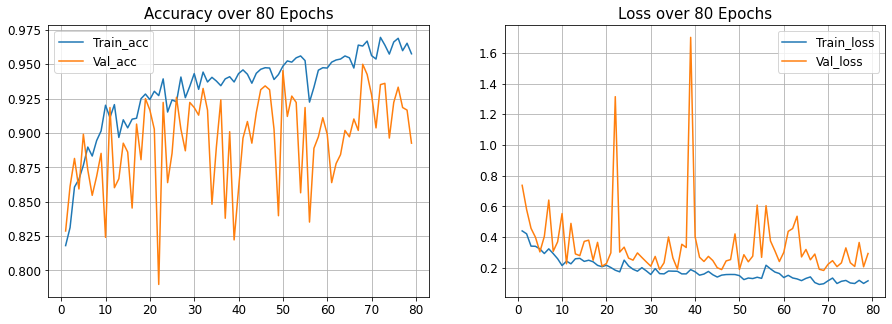

In [ ]:
import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['binary_accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_binary_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 80)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


[[59  1  0  0]
 [ 0 80  0  0]
 [ 0  0 57 17]
 [ 1  3  4 62]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.95      1.00      0.98        80
           2       0.93      0.77      0.84        74
           3       0.78      0.89      0.83        70

    accuracy                           0.91       284
   macro avg       0.91      0.91      0.91       284
weighted avg       0.91      0.91      0.91       284



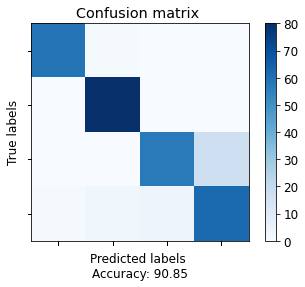

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneumonia_bac","pneumonia_vir"]
#print(confusion_matrix(classes,predict))

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks(classes, [])
plt.yticks(classes, [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()